**Gaia dr2  and edr3 data | HR diagram fo a 100,000 sample**

MJ Shahhoseini | Septemeber 2022

https://gea.esac.esa.int/archive/

https://vlas.dev/post/gaia-dr2-hrd/

https://allendowney.github.io/AstronomicalData/06_photo.html

http://stev.oapd.inaf.it/cgi-bin/cmd_3.6

https://sci.esa.int/web/gaia/-/60198-gaia-hertzsprung-russell-diagram

https://www.cosmos.esa.int/web/gaia/gaiadr2_hrd

In [ ]:
# Modules installation

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery
    !pip install astropy
    !pip install matplotlib
    !pip install numpy

In [ ]:
# LaTex installation for text details in matplotlib

! sudo apt-get install texlive-latex-recommended 
! apt install cm-super
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 

# Fig. 1 - Sample 100,000 with filters

In [ ]:
# query details from Gaia collaboration 2018 paper | dr2 source
## Just to show the query details

def send_radial_gaia_query(query_size=100000):

    from astroquery.utils.tap.core import TapPlus

    gaia = TapPlus(url="http://gea.esac.esa.int/tap-server/tap")

    job = gaia.launch_job_async("SELECT TOP 100000 phot_g_mean_mag+5*log10(parallax)-10 as mg, bp_rp from gaiadr2.gaia_source"
        " where parallax_over_error > 10"
        " and visibility_periods_used > 8"
        " and phot_g_mean_flux_over_error > 50"
        " and phot_bp_mean_flux_over_error > 20"
        " and phot_rp_mean_flux_over_error > 20"
        " and phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
        " and phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
        " and astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))")
    return job

In [ ]:
# CSV table from the gaia archive

import numpy as np

try:
    gaiarec = np.recfromcsv("/content/mj-gaia-hrd-dr2.csv")
    bp_rp, mg = gaiarec.bp_rp, gaiarec.mg
except OSError:
    job = send_radial_gaia_query(dump_to_file=True, output_format="csv",
                                 output_file="/content/mj-gaia-hrd-dr2.csv",
                                 query_size=100000)
    r = job.get_results()
    bp_rp = r['bp_rp'].data
    mg = r['mg'].data
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

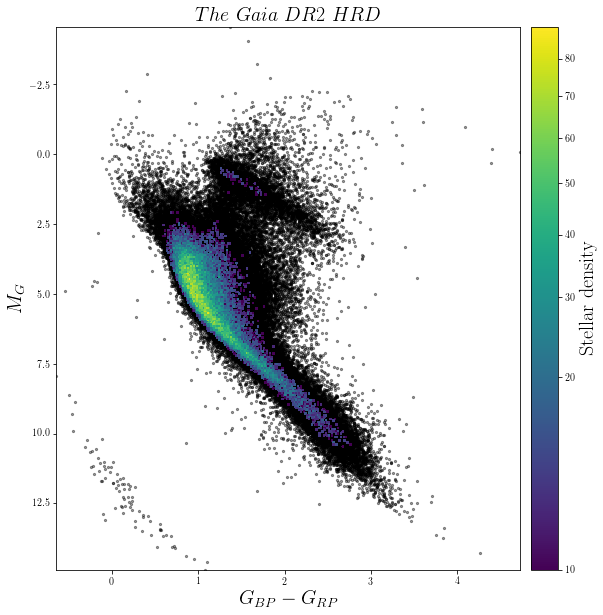

In [ ]:
# Ploting the HR diagram for dr2 gaia with 100,000 sample

import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from google.colab import files

plt.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(10, 10))

# only show 2D-histogram for bins with more than 10 stars in them
h = ax.hist2d(bp_rp, mg, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)

ax.scatter(bp_rp, mg, alpha=0.4, s=5, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_title(r'$The~Gaia~DR2~HRD$', fontsize=20)
ax.set_xlabel(r'$G_{BP} - G_{RP}$',fontsize=20)
ax.set_ylabel(r'$M_G$',fontsize=20)
cb.set_label(r"$\mathrm{Stellar~density}$",fontsize=20)
#plt.savefig("/content/gaiadr2.png")
#files.download("/content/gaiadr2.png") 


# Extension 1 - with filters including the E(B-V) < 0.015 mag criteria (Fig. 5)

In [ ]:
# HRD for low-extinction stars query 
## Just to show the correction line

def send_radial_gaia_query(query_size=100000):

    from astroquery.utils.tap.core import TapPlus

    gaia = TapPlus(url="http://gea.esac.esa.int/tap-server/tap")

    job1 = gaia.launch_job_async("SELECT TOP 100000 phot_g_mean_mag+5*log10(parallax)-10 as mg, bp_rp, (bp_rp - e_bp_min_rp_val) as bp_rp_index, gaia_source.e_bp_min_rp_val from gaiadr2.gaia_source"
        " where parallax_over_error > 10"
        " and gaia_source.e_bp_min_rp_val < 0.415" # applying E(E_Bp-Rp) correction from E(B-V) < 0.015 (correction line)
        " and visibility_periods_used > 8"
        " and phot_g_mean_flux_over_error > 50"
        " and phot_bp_mean_flux_over_error > 20"
        " and phot_rp_mean_flux_over_error > 20"
        " and phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
        " and phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
        " and astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))")
    return job1

In [ ]:
import numpy as np

try:
    gaiarec = np.recfromcsv("/content/mj-gaia-hrd-dr2-low_extinct.csv")
    bp_rp1, mg1 = gaiarec.bp_rp, gaiarec.mg
except OSError:
    job1 = send_radial_gaia_query(dump_to_file=True, output_format="csv",
                                 output_file="/content/mj-gaia-hrd-dr2-low_extinct.csv",
                                 query_size=100000)
    r1 = job1.get_results()
    bp_rp1 = r1['bp_rp'].data
    mg1 = r1['mg'].data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

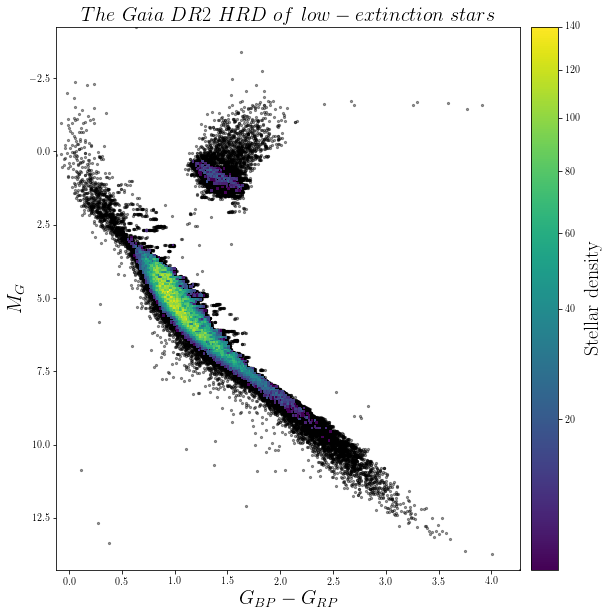

In [ ]:
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from google.colab import files

plt.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(10, 10))

h1 = ax.hist2d(bp_rp1, mg1, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)

ax.scatter(bp_rp1, mg1, alpha=0.4, s=5, color='k', zorder=0)
ax.invert_yaxis()
cb = fig.colorbar(h1[3], ax=ax, pad=0.02)
ax.set_title(r'$The~Gaia~DR2~HRD~of~low-extinction~stars$', fontsize=20)
ax.set_xlabel(r'$G_{BP} - G_{RP}$',fontsize=20)
ax.set_ylabel(r'$M_G$',fontsize=20)
cb.set_label(r"$\mathrm{Stellar~density}$",fontsize=20)
#plt.savefig("/content/gaiadr2_low_extinct.png")
#files.download("/content/gaiadr2_low_extinct.png") 


# Extension 2 - including the EDR3 Gaia data with filters

In [ ]:
import numpy as np

try:
    gaiarec = np.recfromcsv("/content/mj-gaia-hrd-edr3.csv")
    bp_rp2, mg2 = gaiarec.bp_rp, gaiarec.mg
except OSError:
    job2 = send_radial_gaia_query(dump_to_file=True, output_format="csv",
                                 output_file="/content/mj-gaia-hrd-edr3.csv",
                                 query_size=100000)
    r2 = job2.get_results()
    bp_rp2 = r2['bp_rp'].data
    mg2 = r2['mg'].data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

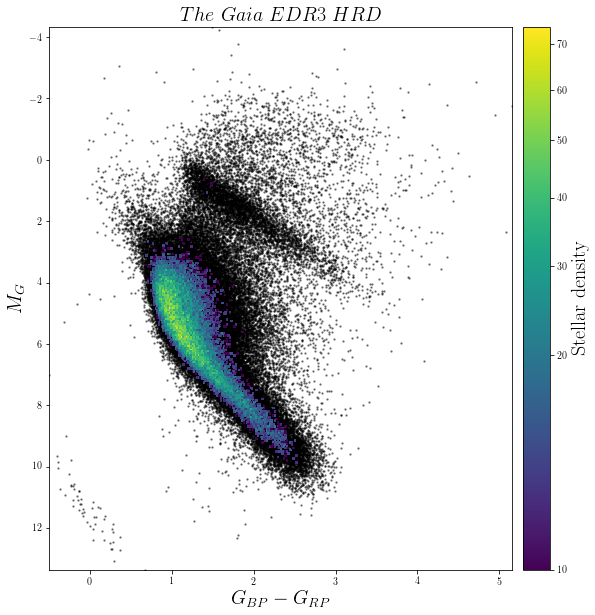

In [ ]:
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from google.colab import files

plt.rc('text', usetex=True)

fig2, ax = plt.subplots(figsize=(10, 10))

h2 = ax.hist2d(bp_rp2, mg2, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)

ax.scatter(bp_rp2, mg2, alpha=0.4, s=2, color='k', zorder=0)
ax.invert_yaxis()
cb2 = fig2.colorbar(h2[3], ax=ax, pad=0.02)
ax.set_title(r'$The~Gaia~EDR3~HRD$', fontsize=20)
ax.set_xlabel(r'$G_{BP} - G_{RP}$',fontsize=20)
ax.set_ylabel(r'$M_G$',fontsize=20)
cb2.set_label(r"$\mathrm{Stellar~density}$",fontsize=20)
#plt.savefig("/content/gaiaedr3.png")
#files.download("/content/gaiaedr3.png") 


# Extension 3 - including the DR2 Gaia data for a nearby cluster

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

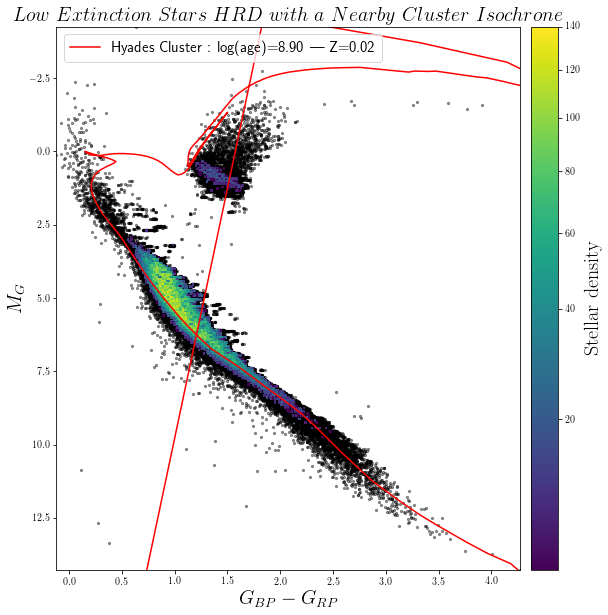

In [ ]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from google.colab import files

try:
    gaiarec = np.recfromcsv("/content/mj-gaia-hrd-dr2-low_extinct.csv")
    bp_rp3, mg3 = gaiarec.bp_rp, gaiarec.mg
except OSError:
    job3 = send_radial_gaia_query(dump_to_file=True, output_format="csv",
                                 output_file="/content/mj-gaia-hrd-dr2-low_extinct.csv",
                                 query_size=100000)
    r3 = job3.get_results()
    bp_rp3 = r3['bp_rp'].data
    mg3 = r3['mg'].data
    

plt.rc('text', usetex=True)

fig3, ax = plt.subplots(figsize=(10, 10))

h3 = ax.hist2d(bp_rp3, mg3, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)

ax.scatter(bp_rp3, mg3, alpha=0.4, s=5, color='k', zorder=0)
ax.invert_yaxis()
cb = fig3.colorbar(h3[3], ax=ax, pad=0.02)
ax.set_title(r'$Low~Extinction~Stars~HRD~with~a~Nearby~Cluster~Isochrone$', fontsize=20)
ax.set_xlabel(r'$G_{BP} - G_{RP}$', fontsize=20)
ax.set_ylabel(r'$M_G$', fontsize=20)
cb.set_label(r"$\mathrm{Stellar~density}$", fontsize=20)



import numpy as np
import matplotlib.pyplot as plt
mg,gpb,grp = np.loadtxt('/content/Hyades_single_Iso.dat',usecols=(28,29,31),unpack =True)

plt.plot(gpb-grp, mg, color='r' , alpha=1, label='Hyades Cluster : log(age)=8.90 | Z=0.02')
plt.legend(loc="upper left",fontsize=15)

#plt.savefig("/content/Hyades_ISO_single_dr2_low.png")
#files.download("/content/Hyades_ISO_single_dr2_low.png") 

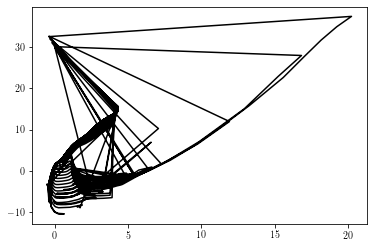

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mg,gpb,grp = np.loadtxt('/content/Hyades_ISO.dat',usecols=(28,29,31),unpack =True)

plt.plot(gpb-grp, mg, color='k')